In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener
from skimage.restoration import estimate_sigma

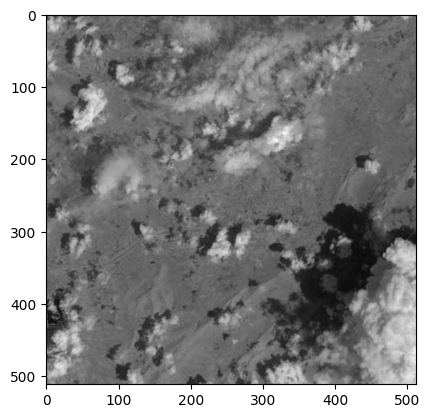

In [3]:
img = cv2.imread("img/test2.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap="gray")
plt.show()

添加高斯噪音

In [36]:
noise = np.random.normal(0, 10, img_gray.shape)
img_noisy = img_gray + noise
img_noisy = np.clip(img_noisy, 0, 255).astype(np.uint8)

维纳滤波实现

In [37]:
img_wiener1 = wiener(img_noisy, (3, 3)) # Unknown SNR
img_wiener2 = wiener(img_noisy, (3, 3), 100) # Known SNR
sigma = estimate_sigma(img_noisy) # Estimate noise standard deviation
img_wiener3 = wiener(img_noisy, (3, 3), sigma**2) # Known image and noise autocorrelation functions

展示结果

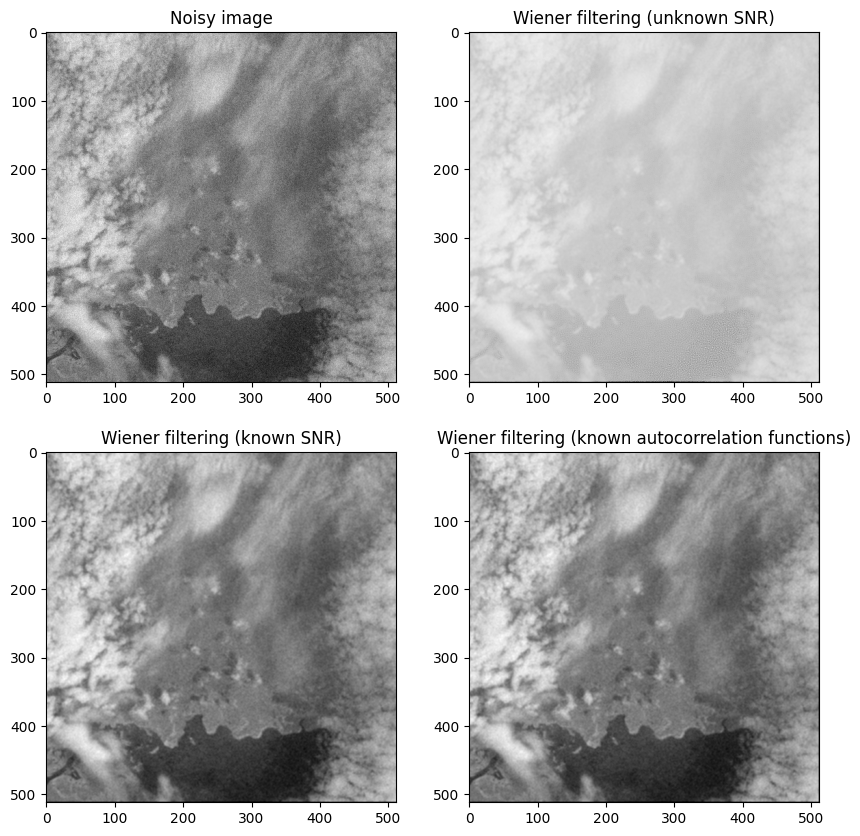

In [38]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img_noisy, cmap="gray")
plt.title("Noisy image")
plt.subplot(2, 2, 2)
plt.imshow(img_wiener1, cmap="gray")
plt.title("Wiener filtering (unknown SNR)")
plt.subplot(2, 2, 3)
plt.imshow(img_wiener2, cmap="gray")
plt.title("Wiener filtering (known SNR)")
plt.subplot(2, 2, 4)
plt.imshow(img_wiener3, cmap="gray")
plt.title("Wiener filtering (known autocorrelation functions)")
plt.show()